In [2]:
import mlflow
import torch

In [3]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
import mlflow

In [4]:
import sys
import pandas as pd
import numpy as np
import warnings

import mlflow

# How to use MLFlow

In [ ]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings

import mlflow

# In Terminal: Run echo 
# echo http://127.0.0.1:5000/ > .mlflow_uri
# THEN: mlflow ui

from modeling.config import EXPERIMENT_NAME
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.start_run()
run = mlflow.active_run()

#Test MLFlow:
print("Active run_id: {}".format(run.info.run_id))

#logging params to mlflow
mlflow.log_params(params)
#setting tags
mlflow.set_tag("running_from_jupyter", "True")
#logging metrics
mlflow.log_metric("train-" + "MSE", mse_train)
mlflow.log_metric("test-" + "MSE", mse_test)
# logging the model to mlflow will not work without a AWS Connection setup.. too complex for now
# but possible if running mlflow locally
# mlflow.log_artifact("../models")
# mlflow.sklearn.log_model(reg, "model")
mlflow.end_run()

mlflow.get_run(run_id=run.info.run_id)

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
import tarfile

Image shape: (720, 1280, 3)
Image data type: uint8


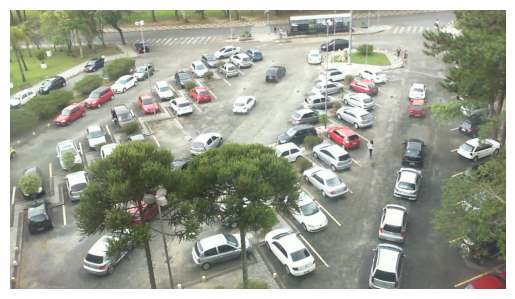

In [9]:
# Have a look at the images
img_path = '../data/PKLot/PKLot/UFPR04/Sunny/2012-12-07/'

imge = '2012-12-07_17_22_25.jpg'
imge_xml = '2012-12-07_17_22_25.xml'

img = Image.open(img_path+imge)
# Read the image
imgocv = cv2.imread(img_path+imge)

# Display information about the image
print(f"Image shape: {imgocv.shape}")
print(f"Image data type: {imgocv.dtype}")

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(imgocv, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)

plt.axis('off')  # Turn off axis labels
plt.show()

In [10]:
# Specify the path to your XML file
xml_file_path = img_path+imge_xml

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')

    rotated_rect = space_element.find('.//rotatedRect')
    center = rotated_rect.find('center')
    center_x = center.get('x')
    center_y = center.get('y')

    contour = space_element.find('.//contour')
    points = contour.findall('point')

    # Process the extracted information
    print(f"Space ID: {space_id}")
    print(f"Occupied: {occupied}")
    print(f"Center: ({center_x}, {center_y})")

    # Extract and print contour points
    print("Contour points:")
    for point in points:
        point_x = point.get('x')
        point_y = point.get('y')
        print(f"  Point: ({point_x}, {point_y})")

    print("\n---\n")

Space ID: 1
Occupied: 1
Center: (724, 623)
Contour points:
  Point: (720, 549)
  Point: (805, 665)
  Point: (715, 698)
  Point: (644, 582)

---

Space ID: 2
Occupied: 1
Center: (774, 511)
Contour points:
  Point: (769, 451)
  Point: (849, 534)
  Point: (789, 586)
  Point: (701, 489)

---

Space ID: 3
Occupied: 1
Center: (812, 445)
Contour points:
  Point: (806, 399)
  Point: (879, 466)
  Point: (823, 499)
  Point: (747, 425)

---

Space ID: 4
Occupied: 1
Center: (836, 368)
Contour points:
  Point: (829, 323)
  Point: (900, 383)
  Point: (862, 430)
  Point: (771, 356)

---

Space ID: 5
Occupied: 1
Center: (865, 317)
Contour points:
  Point: (850, 282)
  Point: (918, 322)
  Point: (891, 368)
  Point: (810, 311)

---

Space ID: 6
Occupied: 1
Center: (885, 266)
Contour points:
  Point: (863, 231)
  Point: (938, 271)
  Point: (909, 309)
  Point: (832, 262)

---

Space ID: 7
Occupied: 1
Center: (903, 226)
Contour points:
  Point: (884, 194)
  Point: (956, 231)
  Point: (928, 265)
  Point: (8

In [11]:
img_rgb_cont = img_rgb.copy()

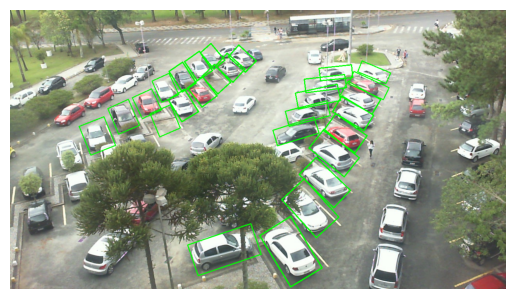

In [12]:
# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')
    center = space_element.find('.//rotatedRect/center')
    center_x = int(float(center.get('x')))
    center_y = int(float(center.get('y')))

    # Print extracted information
    #print(f"\nSpace ID: {space_id}")
    #print(f"Occupied: {occupied}")
    #print(f"Center: ({center_x}, {center_y})")

    # Attempt to find the <contour> element directly under <space>
    contour_element = space_element.find('.//contour')
    
    if contour_element is not None:
        # Attempt to find <point> elements under <contour>
        contour_points = contour_element.findall('point')
        
        # Print the path to contour points
        #print(f"Contour points path: .//contour/point")
        
        # Print number of contour points
        #print(f"Number of contour points: {len(contour_points)}")

        # Convert the list of points to a numpy array
        points_array = np.array([(int(point.get('x')), int(point.get('y'))) for point in contour_points], dtype=np.int32)

        # Check if enough points are available
        if len(points_array) >= 3:
            # Calculate the bounding box coordinates
            rect = cv2.minAreaRect(points_array)
            box = cv2.boxPoints(rect)
            box = box.astype(int)

            # Print bounding box coordinates
            #print("Box:", box)

            # Draw the bounding box on the copied image
            cv2.drawContours(img_rgb_cont, [box], 0, (0, 255, 0), 2)
        else:
            print("Error: Not enough points for bounding box.")
    else:
        print("Error: <contour> element not found for the space.")

# Display the image with bounding boxes
plt.imshow(img_rgb_cont)
plt.axis('off')  # Turn off axis labels
plt.show()

7

## To Do's

1. Collect all the images that we want to train the model with.
2. Extract the target variable: Either Empty or Occupied
3. Seperate into Train, Test and Validation Set
4. Decide for a model that we can use
5. Run a first test run on the model

In [6]:
import os
import shutil
import random


In [25]:
import os
import shutil
import random

# Pfade zu den Quell- und Zielordnern
src_path = '../data/PKLot/PKLotSegmented/PUC/Sunny'
dst_path = '../data/model/PUC/Sunny'

# Funktion zum Erstellen von Trainings-, Validierungs- und Testordnern mit Unterordnern Empty und Occupied
def create_folders(parent_path):
    for folder_name in ['train', 'validation', 'test']:
        folder_path = os.path.join(parent_path, folder_name)
        os.makedirs(os.path.join(folder_path, 'Empty'), exist_ok=True)
        os.makedirs(os.path.join(folder_path, 'Occupied'), exist_ok=True)

# Erstellen von Trainings-, Validierungs- und Testordnern mit Unterordnern Empty und Occupied
create_folders(dst_path)

# Funktion zum Kopieren der Bilder in die Trainings-, Validierungs- oder Testordner
def copy_images(src, dst):
    for day_folder in os.listdir(src):
        day_path = os.path.join(src, day_folder)
        if os.path.isdir(day_path):
            for label_folder in os.listdir(day_path):
                label_path = os.path.join(day_path, label_folder)
                if os.path.isdir(label_path):
                    files = [os.path.join(label_path, f) for f in os.listdir(label_path)]
                    random.shuffle(files)  # Zufällige Reihenfolge der Dateien
                    
                    # Bestimmen des Zielordners (train, validation, test)
                    if label_folder == 'Empty':
                        dst_folder = os.path.join(dst, 'train' if random.random() < 0.7 else 'validation' if random.random() < 0.15 else 'test', 'Empty')
                    elif label_folder == 'Occupied':
                        dst_folder = os.path.join(dst, 'train' if random.random() < 0.7 else 'validation' if random.random() < 0.15 else 'test', 'Occupied')

                    # Kopieren der Dateien in entsprechende Ordner
                    for src_file in files:
                        shutil.copy(src_file, os.path.join(dst_folder, os.path.basename(src_file)))

# Kopieren der Bilder in Trainings-, Validierungs- und Testordner mit "Empty" und "Occupied" Unterordnern
copy_images(src_path, dst_path)

In [33]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Pfade zu den Quell- und Zielordnern
src_path = '../data/PKLot/PKLotSegmented/PUC/Sunny'
dst_path = '../data/model/PUC/Sunny'

# Funktion zum Erstellen von Trainings-, Validierungs- und Testordnern mit Unterordnern Empty und Occupied
def create_folders(parent_path):
    for folder_name in ['train', 'validation', 'test']:
        folder_path = os.path.join(parent_path, folder_name)
        os.makedirs(os.path.join(folder_path, 'Empty'), exist_ok=True)
        os.makedirs(os.path.join(folder_path, 'Occupied'), exist_ok=True)

# Erstellen von Trainings-, Validierungs- und Testordnern mit Unterordnern Empty und Occupied
create_folders(dst_path)

# Funktion zum Kopieren der Bilder in die Trainings-, Validierungs- oder Testordner
def copy_images(src, dst):
    for day_folder in os.listdir(src):
        day_path = os.path.join(src, day_folder)
        if os.path.isdir(day_path):
            empty_files = [os.path.join(day_path, 'Empty', f) for f in os.listdir(os.path.join(day_path, 'Empty'))]
            occupied_files = [os.path.join(day_path, 'Occupied', f) for f in os.listdir(os.path.join(day_path, 'Occupied'))]
            
            # Stratifizierte Aufteilung für Empty- und Occupied-Dateien
            empty_train, empty_valtest = train_test_split(empty_files, test_size=0.2, random_state=42)
            occupied_train, occupied_valtest = train_test_split(occupied_files, test_size=0.2, random_state=42)
            empty_val, empty_test = train_test_split(empty_valtest, test_size=0.3, random_state=42)
            occupied_val, occupied_test = train_test_split(occupied_valtest, test_size=0.3, random_state=42)
            
            # Kopieren der Dateien in die entsprechenden Ordner
            copy_files(empty_train, 'Empty', 'train', dst)
            copy_files(empty_val, 'Empty', 'validation', dst)
            copy_files(empty_test, 'Empty', 'test', dst)
            copy_files(occupied_train, 'Occupied', 'train', dst)
            copy_files(occupied_val, 'Occupied', 'validation', dst)
            copy_files(occupied_test, 'Occupied', 'test', dst)

# Funktion zum Kopieren von Dateien in die entsprechenden Ordner
def copy_files(files, label, split, dst):
    for src_file in files:
        dst_folder = os.path.join(dst, split, label)
        shutil.copy(src_file, os.path.join(dst_folder, os.path.basename(src_file)))

# Kopieren der Bilder in Trainings-, Validierungs- und Testordner mit "Empty" und "Occupied" Unterordnern
copy_images(src_path, dst_path)

ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/PUC/Sunny/Empty',
    '../data/model/PUC/Sunny/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/PUC/Sunny/Empty: 111626
Anzahl der Dateien in ../data/model/PUC/Sunny/Occupied: 96761


In [36]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/PUC/Sunny/"
DATASET_PATH = "../data/model/PUC/Sunny/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-10-30/Empty empty
path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-11-07/Empty empty
path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-11-06/Empty empty


# Develop baseline model

In [37]:
# Here will be a simple model for this dataset (PUC/Sunny) that will allow us to make a first estimate, 
# about how this model can perform



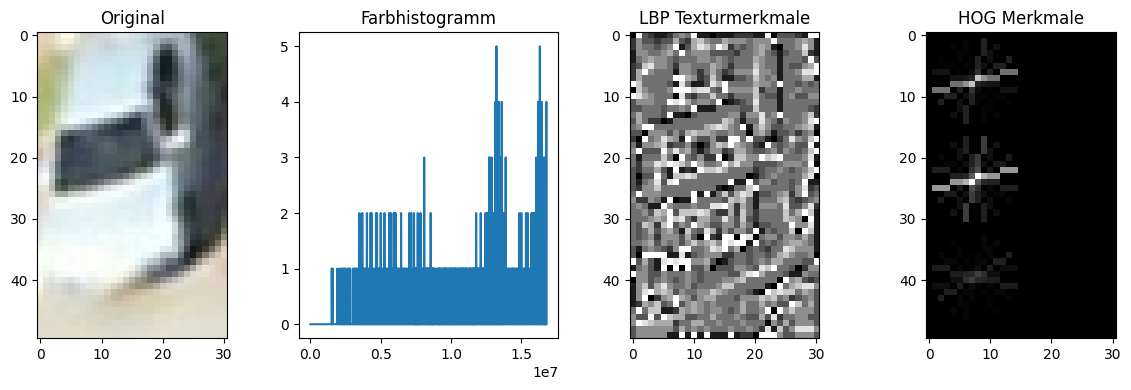

In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage import feature

# Dateipfad
image_path = '../data/model/PUC/Sunny/Occupied/2012-09-11_15_16_58#005.jpg'

# Bild einlesen
image = cv2.imread(image_path)

# Bild in Graustufen konvertieren
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Bild anzeigen
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Farbhistogramm erstellen
hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist = hist.flatten()
plt.subplot(1, 4, 2)
plt.plot(hist)
plt.title('Farbhistogramm')

# Texturmerkmale (LBP) erstellen
lbp = feature.local_binary_pattern(gray, P=8, R=1, method='uniform')
plt.subplot(1, 4, 3)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Texturmerkmale')

# HOG (Histogram of Oriented Gradients) erstellen
hog_features, hog_image = feature.hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
plt.subplot(1, 4, 4)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Merkmale')

plt.tight_layout()
plt.show()

In [7]:

# Bild laden
image = cv2.imread('../data/model/PUC/Sunny/Occupied/2012-09-11_15_16_58#001.jpg')

# Bildgröße ermitteln
height, width, channels = image.shape

# Skalierung berechnen
scale = width / height

# Skalierung ausgeben
print(height, width, channels)

55 32 3


In [8]:
# Ordner mit Bildern öffnen
images_folder = os.path.join('..', 'data', 'model', 'PUC', 'Sunny', 'Occupied')

# Liste mit allen Bilddateien erstellen
image_files = os.listdir(images_folder)

# Kleinste Bildgröße ermitteln
smallest_image_size = None
for image_file in image_files:
    image = cv2.imread(os.path.join(images_folder, image_file))
    height, width, channels = image.shape
    if smallest_image_size is None or width < smallest_image_size[0]:
        smallest_image_size = (width, height)

# Kleinste Bildgröße ausgeben
print(smallest_image_size)

(28, 48)


In [9]:
# Ordner mit Bildern öffnen
images_folder = os.path.join('..', 'data', 'model', 'PUC', 'Sunny', 'Empty')

# Liste mit allen Bilddateien erstellen
image_files = os.listdir(images_folder)

# Kleinste Bildgröße ermitteln
smallest_image_size = None
for image_file in image_files:
    image = cv2.imread(os.path.join(images_folder, image_file))
    height, width, channels = image.shape
    if smallest_image_size is None or width < smallest_image_size[0]:
        smallest_image_size = (width, height)

# Kleinste Bildgröße ausgeben
print(smallest_image_size)

(28, 48)


In [7]:
# Bild laden
image = cv2.imread('../data/model/PUC/Sunny/Occupied/2012-09-11_15_16_58#005.jpg')

# Bildgröße ermitteln
height, width, channels = image.shape

# Bild auf 224 x 224 Pixel skalieren
scaled_image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

# Bildgröße ausgeben
print(scaled_image.shape)

# Bild anzeigen
cv2.imshow('Original', image)
cv2.imshow('Scaled', scaled_image)
cv2.waitKey(0)

(224, 224, 3)


/var/folders/6j/c53tgnmd41sctcj616bwgdbr0000gn/T/ipykernel_66194/862806795.py:31: RuntimeWarning: invalid value encountered in cast
  transformed_image = (transformed_image.numpy().transpose((1, 2, 0)) * 255).astype('uint8')


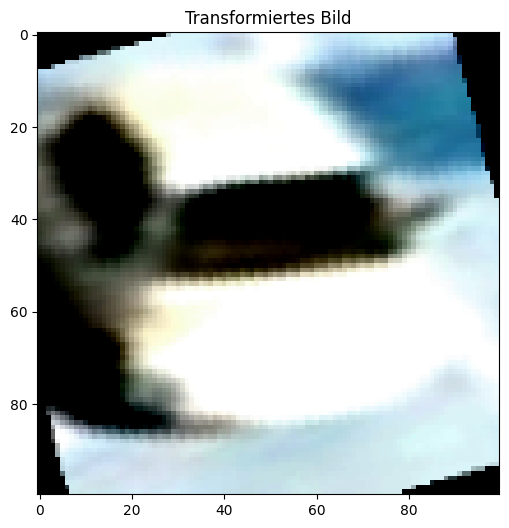

In [32]:
import cv2
import matplotlib.pyplot as plt
from skimage import feature
from torchvision import transforms

# Dateipfad
#image_path = '../data/model/PUC/Sunny/Occupied/2012-09-11_15_16_58#005.jpg'
#image_path = '../data/model/PUC/Sunny/Empty/2012-09-11_15_16_58#002.jpg'
image_path = '../data/model/PUC/Sunny/Occupied/2012-09-11_15_16_58#001.jpg'


# Bild einlesen
image = cv2.imread(image_path)

# Definition der Transformationen
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Anwendung der Transformationen
transformed_image = data_transform(image)

# Umwandlung von Tensor in NumPy-Array und Rückkehr der Werte auf den Bereich [0, 255]
transformed_image = (transformed_image.numpy().transpose((1, 2, 0)) * 255).astype('uint8')

# Bild anzeigen
plt.figure(figsize=(6, 6))
plt.imshow(transformed_image)
plt.title('Transformiertes Bild')
plt.show()

In [ ]:
resize = transforms.Resize(size=(INPUT_HEIGHT,INPUT_WIDTH),interpolation=transforms.InterpolationMode.BICUBIC )
trainTransfo = transforms.Compose([resize, transforms.ToTensor()])
trainDataset = ImageFolder(root=trainpath,
        transform=trainTransfo)
valDataset = ImageFolder(root=valpath,
        transform=trainTransfo)
trainDataLoader = DataLoader(trainDataset,
        batch_size=BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)

In [33]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# Train Baseline Model

In [34]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image

## Warum ResNet18?
ResNet18 ist eine spezielle Variante des ResNet (Residual Network) und wurde für die Bildklassifizierung entwickelt. Hier sind einige Gründe, warum ResNet18 eine beliebte Wahl ist:

Residual Learning (Skip Connections): Das ResNet-Design enthält sogenannte "Skip Connections" oder "Residual Connections". Diese ermöglichen es, das Modell tiefer zu machen, indem sie "Sprung"-Verbindungen über Schichten hinweg einführen. Dies erleichtert das Training von tieferen Netzen, indem es das Problem des Verschwindens von Gradienten lindert.

Leistung trotz geringerer Komplexität: ResNet18 hat im Vergleich zu tieferen Varianten wie ResNet50 eine geringere Modellkomplexität. Dies macht es effizienter und schneller zu trainieren, insbesondere wenn die verfügbare Datenmenge begrenzt ist.

Gute allgemeine Leistung: ResNet18 hat sich als robustes Modell für verschiedene Bildklassifizierungsaufgaben bewährt. Es bietet eine gute Balance zwischen Modellgröße und Leistung.

Bewährte Architektur: ResNet-Architekturen wurden in verschiedenen Herausforderungen und Wettbewerben erfolgreich eingesetzt, einschließlich des ImageNet Large Scale Visual Recognition Challenge. Die Architektur hat sich als effektiv für die Merkmalsextraktion und Klassifizierung in Bildern erwiesen.

Verfügbarkeit von vortrainierten Modellen: Da ResNet-Modelle weit verbreitet sind, sind vortrainierte Gewichte für ResNet18 verfügbar. Dies ermöglicht den Transfer von Wissen (Transfer Learning), was besonders nützlich ist, wenn nur begrenzte Daten für das Training verfügbar sind.

Ressourceneffizienz: ResNet18 ist weniger rechenintensiv als tiefere Varianten und eignet sich daher besser für Anwendungen mit begrenzten Ressourcen, wie etwa auf mobilen Geräten oder Edge-Geräten.

Insgesamt wird ResNet18 aufgrund seiner effektiven Architektur, seiner guten Leistung und seiner Verfügbarkeit von vortrainierten Modellen häufig für Bildklassifizierungsaufgaben verwendet.

In [38]:
# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den Datensatz
dataset = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (Beispiel: ResNet18)
model = models.resnet18(pretrained=True)
# Anpassung des Klassifikationskopfes an Ihre Klassenanzahl
model.fc = nn.Linear(model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialisieren von MLflow
import mlflow
from datetime import datetime

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "ResNet_first_try" + datetime.now().strftime("%Y%m%d%H%M%S")
# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
mlflow.start_run()

# Training durchführen
num_epochs = 10
for epoch in range(num_epochs):
    # Trainingsphase
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validierungsphase
    model.eval()
    val_loss = 0.0
    corrects = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model, artifact_path="ResNet_first_try")

# Beenden Sie den MLflow-Run
mlflow.end_run()

2024/01/11 15:58:40 INFO mlflow.tracking.fluent: Experiment with name 'ResNet_first_try20240111155840' does not exist. Creating a new experiment.


In [39]:
# Speichern Sie das Modell manuell
torch.save(model.state_dict(), "resnet_model.pth")

# Laden Sie das Modell wieder
loaded_model = models.resnet18(pretrained=False)
loaded_model.fc = nn.Linear(loaded_model.fc.in_features, 2)
loaded_model.load_state_dict(torch.load("resnet_model.pth"))
loaded_model.eval()

/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import classification_report, confusion_matrix
import mlflow.pytorch

In [42]:
# Testen Sie das Modell auf dem Testdatensatz
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16613
           1       1.00      1.00      1.00     14646

    accuracy                           1.00     31259
   macro avg       1.00      1.00      1.00     31259
weighted avg       1.00      1.00      1.00     31259


Confusion Matrix:
[[16609     4]
 [   23 14623]]


# Testen auf Daten die nicht im Testset waren
#### Hier: Cloudy aus 2012-09-12

In [43]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from torchvision.transforms import functional as F

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/PKLot/PKLotSegmented/PUC/Cloudy/2012-09-12', transform=data_transform)

# Data Loader erstellen
val2_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val2_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      3195

    accuracy                           1.00      5098
   macro avg       1.00      1.00      1.00      5098
weighted avg       1.00      1.00      1.00      5098


Confusion Matrix:
[[1903    0]
 [   0 3195]]


In [44]:
# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/PKLot/PKLotSegmented/PUC/Rainy/2012-09-16', transform=data_transform)

# Data Loader erstellen
val2_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val2_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2349
           1       1.00      0.96      0.98        51

    accuracy                           1.00      2400
   macro avg       1.00      0.98      0.99      2400
weighted avg       1.00      1.00      1.00      2400


Confusion Matrix:
[[2349    0]
 [   2   49]]


In [45]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/PKLot/PKLotSegmented/UFPR04/Sunny/2012-12-07', transform=data_transform)

# Data Loader erstellen
val3_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val3_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       305
           1       1.00      0.97      0.99       892

    accuracy                           0.98      1197
   macro avg       0.96      0.99      0.98      1197
weighted avg       0.98      0.98      0.98      1197


Confusion Matrix:
[[305   0]
 [ 23 869]]


In [50]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/PKLot/PKLotSegmented/UFPR04/Rainy/2013-01-16', transform=data_transform)

# Data Loader erstellen
val3_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val3_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        77
           1       1.00      0.96      0.98       124

    accuracy                           0.98       201
   macro avg       0.97      0.98      0.97       201
weighted avg       0.98      0.98      0.98       201


Confusion Matrix:
[[ 77   0]
 [  5 119]]


In [51]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/PKLot/PKLotSegmented/UFPR05/Cloudy/2013-03-13', transform=data_transform)

# Data Loader erstellen
val3_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val3_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       479
           1       0.99      1.00      1.00      2840

    accuracy                           0.99      3319
   macro avg       0.99      0.98      0.99      3319
weighted avg       0.99      0.99      0.99      3319


Confusion Matrix:
[[ 459   20]
 [   4 2836]]


### Take Rainy Dataset from PUC and put it in order

In [52]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/PUC/Rainy/"
DATASET_PATH = "../data/model/PUC/Rainy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

In [53]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/PUC/Rainy/Empty',
    '../data/model/PUC/Rainy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/PUC/Rainy/Empty: 27951
Anzahl der Dateien in ../data/model/PUC/Rainy/Occupied: 55105


### Test PUC/Rainy Data on trained ResNet18 Model and measure its performance

In [54]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)

# Data Loader erstellen
val3_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val3_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27951
           1       1.00      1.00      1.00     55105

    accuracy                           1.00     83056
   macro avg       1.00      1.00      1.00     83056
weighted avg       1.00      1.00      1.00     83056


Confusion Matrix:
[[27861    90]
 [   92 55013]]


## Test on Cloudy Data Set from PUC

Copy data into new file to make classification easier

In [55]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/PUC/Cloudy/"
DATASET_PATH = "../data/model/PUC/Cloudy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

In [56]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/PUC/Cloudy/Empty',
    '../data/model/PUC/Cloudy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/PUC/Cloudy/Empty: 90417
Anzahl der Dateien in ../data/model/PUC/Cloudy/Occupied: 42363


Classification of cloudy data on trained model (loaded_model)

In [57]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)

# Data Loader erstellen
val3_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val3_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90417
           1       1.00      1.00      1.00     42363

    accuracy                           1.00    132780
   macro avg       1.00      1.00      1.00    132780
weighted avg       1.00      1.00      1.00    132780


Confusion Matrix:
[[90416     1]
 [   22 42341]]


In [58]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR04/Sunny/"
DATASET_PATH = "../data/model/UFPR04/Sunny/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/UFPR04/Sunny/2012-12-24/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR04/Sunny/2012-12-23/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR04/Sunny/2012-12-25/Occupied empty


In [59]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR04/Sunny/Empty',
    '../data/model/UFPR04/Sunny/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR04/Sunny/Empty: 26334
Anzahl der Dateien in ../data/model/UFPR04/Sunny/Occupied: 32166


In [60]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)

# Data Loader erstellen
val4_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val4_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26334
           1       0.99      0.97      0.98     32166

    accuracy                           0.98     58500
   macro avg       0.98      0.98      0.98     58500
weighted avg       0.98      0.98      0.98     58500


Confusion Matrix:
[[26131   203]
 [  808 31358]]


In [61]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR04/Rainy/"
DATASET_PATH = "../data/model/UFPR04/Rainy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/UFPR04/Rainy/2012-12-29/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR04/Rainy/2012-12-28/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR04/Rainy/2012-12-08/Occupied empty


In [62]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR04/Rainy/Empty',
    '../data/model/UFPR04/Rainy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR04/Rainy/Empty: 5607
Anzahl der Dateien in ../data/model/UFPR04/Rainy/Occupied: 2351


In [63]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)

# Data Loader erstellen
val5_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val5_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5607
           1       1.00      0.96      0.98      2351

    accuracy                           0.99      7958
   macro avg       0.99      0.98      0.99      7958
weighted avg       0.99      0.99      0.99      7958


Confusion Matrix:
[[5606    1]
 [  95 2256]]


In [64]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR04/Cloudy/"
DATASET_PATH = "../data/model/UFPR04/Cloudy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/UFPR04/Cloudy/2012-12-29/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR04/Cloudy/2013-01-20/Occupied empty


In [65]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR04/Cloudy/Empty',
    '../data/model/UFPR04/Cloudy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR04/Cloudy/Empty: 27777
Anzahl der Dateien in ../data/model/UFPR04/Cloudy/Occupied: 11608


In [67]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)

# Data Loader erstellen
val6_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val6_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27777
           1       1.00      0.97      0.99     11608

    accuracy                           0.99     39385
   macro avg       0.99      0.99      0.99     39385
weighted avg       0.99      0.99      0.99     39385


Confusion Matrix:
[[27743    34]
 [  305 11303]]


In [68]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR05/Sunny/"
DATASET_PATH = "../data/model/UFPR05/Sunny/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/UFPR05/Sunny/2013-03-10/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR05/Sunny/2013-03-03/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR05/Sunny/2013-02-24/Occupied empty


In [69]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR05/Sunny/Empty',
    '../data/model/UFPR05/Sunny/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR05/Sunny/Empty: 42306
Anzahl der Dateien in ../data/model/UFPR05/Sunny/Occupied: 57584


In [70]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)

# Data Loader erstellen
val6_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val6_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     42306
           1       0.94      0.99      0.97     57584

    accuracy                           0.96     99890
   macro avg       0.96      0.95      0.96     99890
weighted avg       0.96      0.96      0.96     99890


Confusion Matrix:
[[38962  3344]
 [  743 56841]]


In [71]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR05/Rainy/"
DATASET_PATH = "../data/model/UFPR05/Rainy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

In [72]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR05/Rainy/Empty',
    '../data/model/UFPR05/Rainy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR05/Rainy/Empty: 2851
Anzahl der Dateien in ../data/model/UFPR05/Rainy/Occupied: 6078


In [73]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Data Loader erstellen
val6_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val6_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2851
           1       0.99      0.99      0.99      6078

    accuracy                           0.98      8929
   macro avg       0.98      0.98      0.98      8929
weighted avg       0.98      0.98      0.98      8929


Confusion Matrix:
[[2784   67]
 [  83 5995]]


In [74]:
DATASET_PATH_RAW = "../data/PKLot/PKLotSegmented/UFPR05/Cloudy/"
DATASET_PATH = "../data/model/UFPR05/Cloudy/"

daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']
for day in daylist:
    for label in labels:
        daypath = os.path.join(DATASET_PATH_RAW,day)
        path = os.path.join(daypath,label)
        destpath =  os.path.join(DATASET_PATH,label)
        if os.path.exists(path):
            filelist = os.listdir(path)
            for file in filelist:
                filepath = os.path.join(path,file)
                shutil.copy(filepath,destpath)
        else:
            print(f'path {path} empty')

path ../data/PKLot/PKLotSegmented/UFPR05/Cloudy/2013-03-03/Occupied empty
path ../data/PKLot/PKLotSegmented/UFPR05/Cloudy/2013-03-02/Occupied empty


In [75]:
import os

# Pfade zu den Ordnern
folders = [
    '../data/model/UFPR05/Cloudy/Empty',
    '../data/model/UFPR05/Cloudy/Occupied',
]

# Funktion zur Zählung der Dateien in den Ordnern
def count_files_in_folders(folders):
    for folder in folders:
        files = os.listdir(folder)
        print(f"Anzahl der Dateien in {folder}: {len(files)}")

# Zählen der Dateien in den Ordnern
count_files_in_folders(folders)

Anzahl der Dateien in ../data/model/UFPR05/Cloudy/Empty: 23202
Anzahl der Dateien in ../data/model/UFPR05/Cloudy/Occupied: 33764


In [76]:
# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)

# Data Loader erstellen
val6_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val6_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     23202
           1       0.97      0.99      0.98     33764

    accuracy                           0.98     56966
   macro avg       0.98      0.98      0.98     56966
weighted avg       0.98      0.98      0.98     56966


Confusion Matrix:
[[22246   956]
 [  174 33590]]


In [ ]:
# Testen Sie das Modell auf dem Testdatensatz
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import classification_report, confusion_matrix
import mlflow.pytorch

# Laden Sie das gespeicherte Modell von MLflow
model_path = "ResNet_first_try"  # Ändern Sie dies entsprechend dem tatsächlichen Pfad
loaded_model = mlflow.pytorch.load_model(model_path)

# Setzen Sie das Modell in den Auswertungsmodus
loaded_model.eval()

# Definieren Sie die Daten-Transformationen für den Testdatensatz
test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den Testdatensatz
test_dataset = datasets.ImageFolder('../data/model/PUC/Sunny', transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Verwenden Sie das Modell, um Vorhersagen für den Testdatensatz zu machen
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

In [ ]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den Datensatz
dataset = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (Beispiel: ResNet18)
model = models.resnet18(pretrained=True)
# Anpassung des Klassifikationskopfes an Ihre Klassenanzahl
model.fc = nn.Linear(model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialisieren von MLflow
import mlflow
from datetime import datetime

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "ResNet_second_try" + datetime.now().strftime("%Y%m%d%H%M%S")
# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
mlflow.start_run()

# Training durchführen
num_epochs = 10
for epoch in range(num_epochs):
    # Trainingsphase
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Loggen der Trainingsmetrik
        mlflow.log_metric("train_loss", loss.item())

    # Validierungsphase
    model.eval()
    val_loss = 0.0
    corrects = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

        # Loggen der Validierungsmetrik
        mlflow.log_metric("val_loss", val_loss)

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model, artifact_path="ResNet_second_try")

# Beenden Sie den MLflow-Run
mlflow.end_run()

In [9]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from datetime import datetime
import pandas as pd
import mlflow

In [77]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from datetime import datetime
import pandas as pd
import mlflow

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_PUC = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)
dataset_UFPR04 = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)
dataset_UFPR05 = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)

# Kombinieren Sie die Datensätze
combined_dataset = ConcatDataset([dataset_PUC, dataset_UFPR04, dataset_UFPR05])

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(combined_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(combined_dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (Beispiel: ResNet18)
model = models.resnet18(pretrained=True)
# Anpassung des Klassifikationskopfes an Ihre Klassenanzahl
model.fc = nn.Linear(model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "resnet18_sunny_datasets"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run():

    # Training durchführen
    num_epochs = 10
    for epoch in range(num_epochs):
        # Trainingsphase
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validierungsphase
        model.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predictions = torch.max(outputs, 1)
                all_predictions.extend(predictions.numpy())
                all_labels.extend(labels.numpy())

        # Berechnung von Metriken
        accuracy = accuracy_score(all_labels, all_predictions)
        precision = precision_score(all_labels, all_predictions)
        recall = recall_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions)
        auc_roc = roc_auc_score(all_labels, all_predictions)
        confusion_mat = confusion_matrix(all_labels, all_predictions)

        # Logging der Metriken
        mlflow.log_metric("train_loss", loss.item())
        mlflow.log_metric("val_loss", val_loss)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("auc_roc", auc_roc)

        # Logging der Confusion Matrix als Datei
        confusion_mat_filepath = "confusion_matrix.csv"
        pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
        mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model, artifact_path="resnet18_sunny_datasets")

# Beenden Sie den MLflow-Run
mlflow.end_run()

/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2024/01/12 16:18:00 INFO mlflow.tracking.fluent: Experiment with name 'resnet18_sunny_datasets' does not exist. Creating a new experiment.
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptool

In [78]:
torch.save(model.state_dict(), "resnet18_sunny_datasets.pth")
mlflow.log_artifact("resnet18_sunny_datasets.pth", "model")

In [79]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Laden Sie das Modell
loaded_model = models.resnet18()
loaded_model.fc = nn.Linear(loaded_model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)
loaded_model.load_state_dict(torch.load("resnet18_sunny_datasets.pth"))
loaded_model.eval()

# Daten-Transformationen für den neuen Datensatz
new_data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=new_data_transform)

# Data Loader erstellen
val6_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val6_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val6_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23202
           1       1.00      1.00      1.00     33764

    accuracy                           1.00     56966
   macro avg       1.00      1.00      1.00     56966
weighted avg       1.00      1.00      1.00     56966


Confusion Matrix:
[[23175    27]
 [   33 33731]]


In [80]:
# Testen Sie das Modell auf dem Testdatensatz
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27135
           1       1.00      1.00      1.00     27883

    accuracy                           1.00     55018
   macro avg       1.00      1.00      1.00     55018
weighted avg       1.00      1.00      1.00     55018


Confusion Matrix:
[[27124    11]
 [   26 27857]]


In [ ]:
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

In [5]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from datetime import datetime
import pandas as pd
import mlflow

In [7]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# Laden Sie das Modell
loaded_model = models.resnet18()
loaded_model.fc = nn.Linear(loaded_model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)
loaded_model.load_state_dict(torch.load("resnet18_sunny_datasets.pth"))
loaded_model.eval()

# Daten-Transformationen für den neuen Datensatz
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie den neuen Datensatz mit datasets.ImageFolder
new_dataset = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)

# Data Loader erstellen
val4_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Testen Sie das Modell auf dem neuen Datensatz (val2_loader)
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val4_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels)

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26334
           1       1.00      1.00      1.00     32166

    accuracy                           1.00     58500
   macro avg       1.00      1.00      1.00     58500
weighted avg       1.00      1.00      1.00     58500


Confusion Matrix:
[[26330     4]
 [   25 32141]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26334
           1       1.00      1.00      1.00     32166

    accuracy                           1.00     58500
   macro avg       1.00      1.00      1.00     58500
weighted avg       1.00      1.00      1.00     58500


Confusion Matrix:
[[26330     4]
 [   25 32141]]


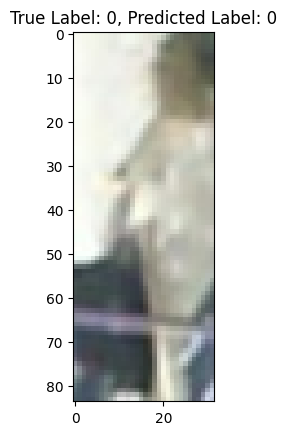

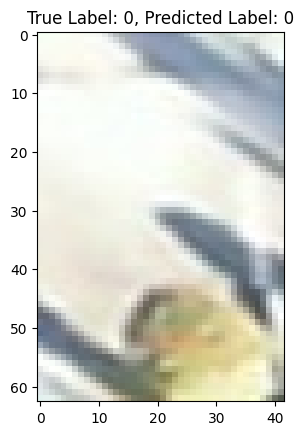

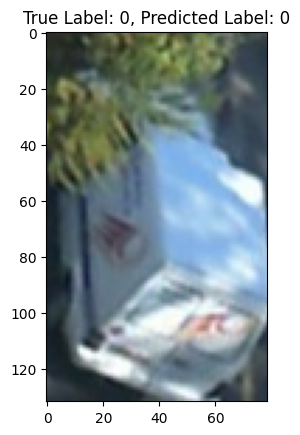

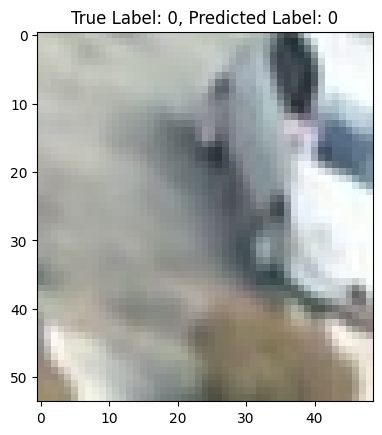

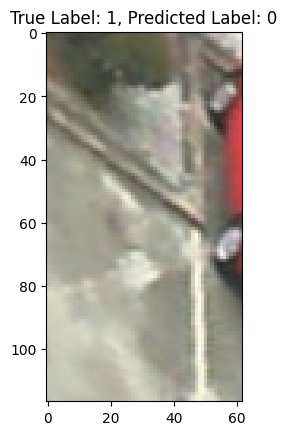

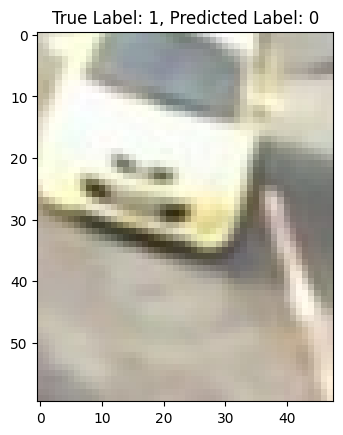

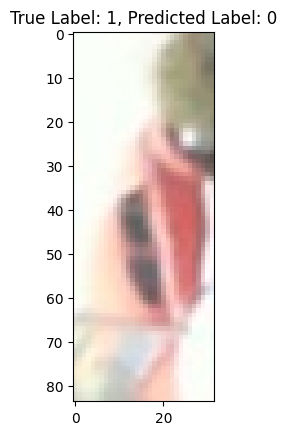

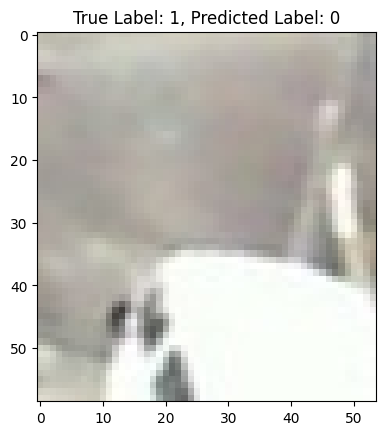

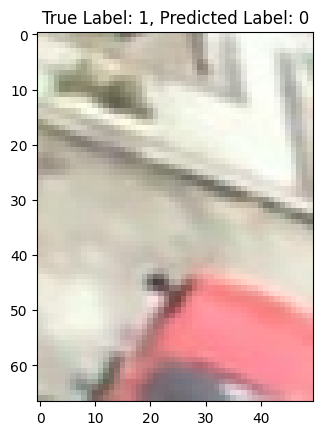

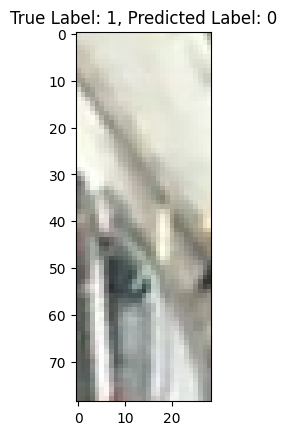

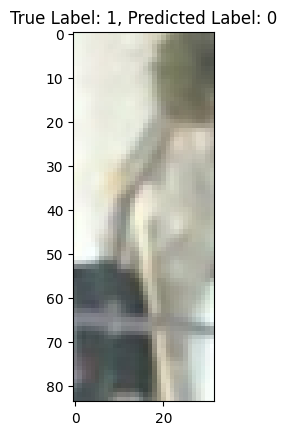

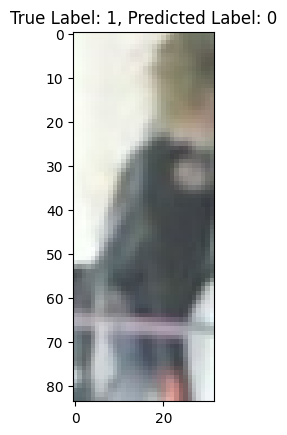

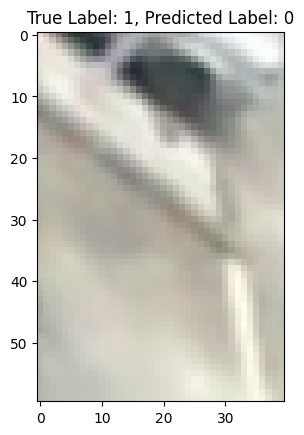

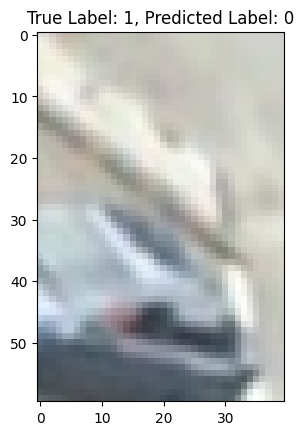

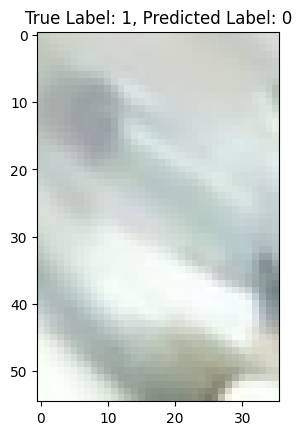

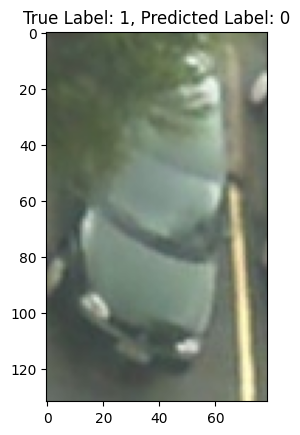

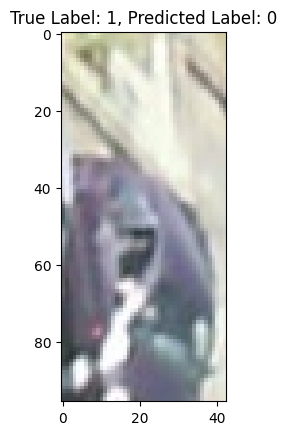

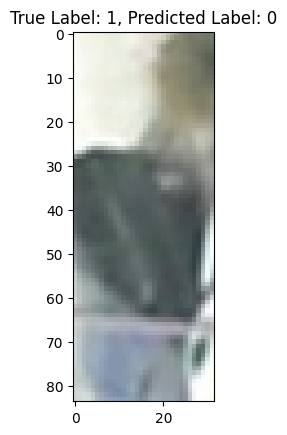

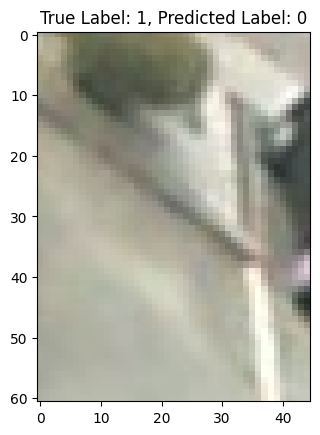

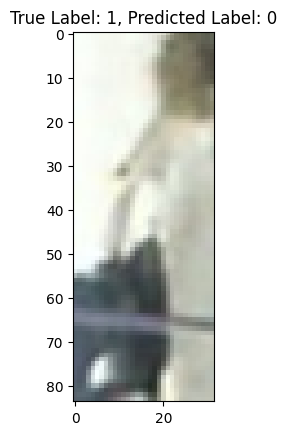

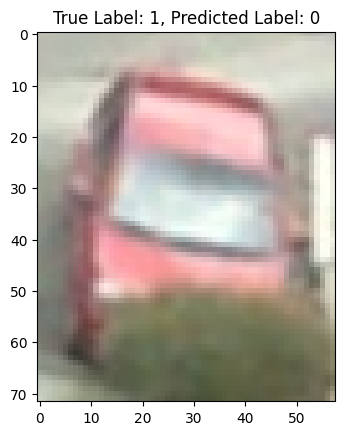

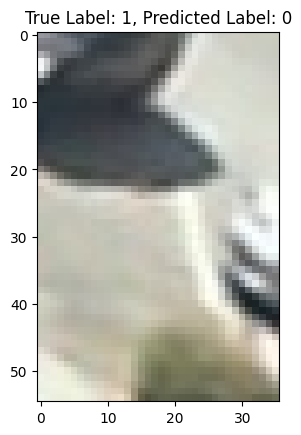

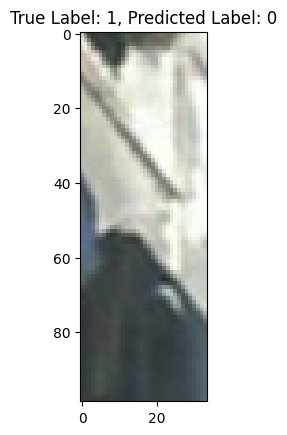

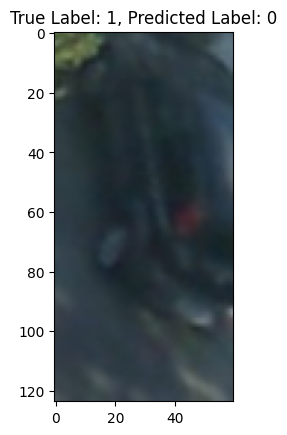

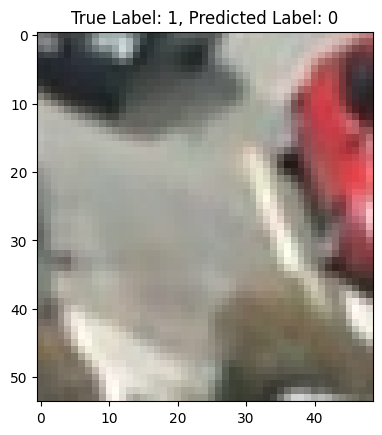

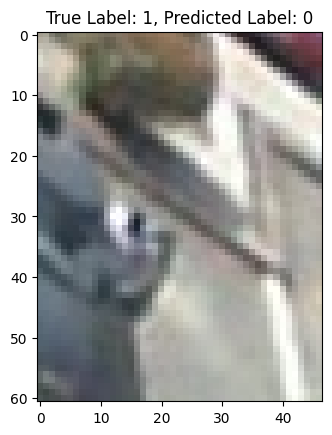

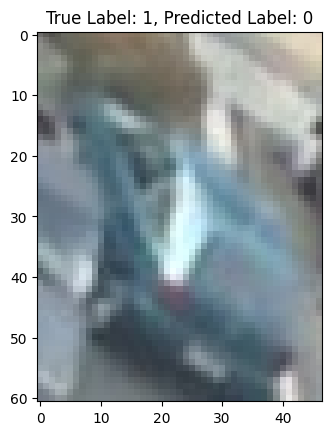

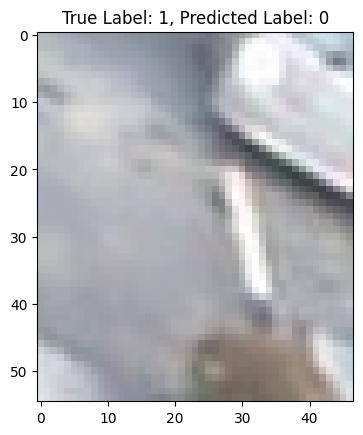

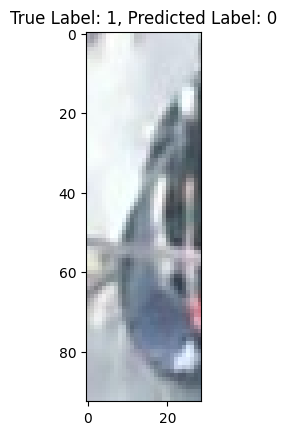

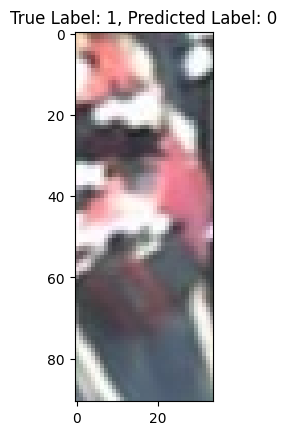

In [8]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... (vorheriger Code bleibt unverändert)

# Testen Sie das Modell auf dem neuen Datensatz (val4_loader)
misclassified_images = []

with torch.no_grad():
    for i, (inputs, labels) in enumerate(val4_loader):
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        misclassified_mask = predictions != labels
        misclassified_indices = (torch.nonzero(misclassified_mask)).squeeze(dim=1)

        for mis_idx in misclassified_indices:
            misclassified_images.append(val4_loader.dataset.imgs[i * val4_loader.batch_size + mis_idx])

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))

# Anzeigen der falsch klassifizierten Bilder
for img_path, true_label in misclassified_images:
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'True Label: {true_label}, Predicted Label: {all_predictions[i]}')
    plt.show()

# Baseline Model in MLFlow

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mlflow
import pandas as pd
import numpy as np
from PIL import Image
import os

import os
from PIL import Image
import numpy as np

# Laden Sie die Bilddaten
image_folder = '../data/model/PUC/Sunny'

# Listen zum Speichern von Features und Labels
features = []
labels = []

# Durchsuchen Sie die Ordner "Empty" und "Occupied"
for label in ['Empty', 'Occupied']:
    label_folder = os.path.join(image_folder, label)
    image_files = [os.path.join(label_folder, file) for file in os.listdir(label_folder) if file.endswith('.jpg')]
    
    # Extrahieren Sie die Merkmale aus den Bildern (hier verwenden wir einfache Mittelwerte der Pixelwerte)
    label_features = [np.array(Image.open(file)).mean() for file in image_files]
    
    # Fügen Sie die Merkmale und entsprechenden Labels hinzu
    features.extend(label_features)
    labels.extend([0 if label == 'Empty' else 1] * len(label_features))

# Konvertieren Sie Features und Labels in NumPy-Arrays
features = np.array(features)
labels = np.array(labels)

# Aufteilen Sie die Daten in Trainings- und Validierungssets
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Aufteilen Sie die Daten in Trainings- und Validierungssets
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Skalieren Sie die Daten
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features.reshape(-1, 1))
val_features_scaled = scaler.transform(val_features.reshape(-1, 1))

# Set tracking URI
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "SVM_basline_model"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name='second_try'):

    # Erstellen Sie einen SVM-Klassifikator
    clf = SVC(C=1)

    # Trainieren Sie den SVM-Klassifikator
    clf.fit(train_features_scaled, train_labels)

    # Evaluieren Sie den SVM-Klassifikator
    val_predictions = clf.predict(val_features_scaled)
    accuracy = accuracy_score(val_labels, val_predictions)
    f1 = f1_score(val_labels, val_predictions)
    roc_auc = roc_auc_score(val_labels, val_predictions)
    confusion_mat = confusion_matrix(val_labels, val_predictions)

    # Logging der Metriken
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    # Logging der Confusion Matrix als Datei
    confusion_mat_filepath = "confusion_matrix.csv"
    pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
    mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

mlflow.end_run()

2024/01/16 15:53:10 INFO mlflow.tracking.fluent: Experiment with name 'SVM_basline_model' does not exist. Creating a new experiment.


In [19]:
#test_features, test_labels = extract_features(test_loader,model)
#test_predictions = clf.predict(test_features)
accuracy = accuracy_score(test_labels, test_predictions)
confusion_mat = confusion_matrix(test_labels, test_predictions)
print(confusion_matrix(test_labels,test_predictions))
print(accuracy)

[[11552  5061]
 [ 3217 11429]]
0.7351802680827921


# Test ResNet18_sunny_datasets on all unseen Data

In [22]:
# Daten-Transformationen für den neuen Datensatz
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
complete_dataset = ConcatDataset([dataset_PUC_cloudy,dataset_PUC_rainy, dataset_UFPR04_cloudy, dataset_UFPR04_rainy, dataset_UFPR05_cloudy, dataset_UFPR05_rainy])
complete_dataset_loader = DataLoader(complete_dataset, batch_size=32, shuffle=True)

with torch.no_grad():
    for inputs, labels in complete_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180700
           1       1.00      1.00      1.00    153374

    accuracy                           1.00    334074
   macro avg       1.00      1.00      1.00    334074
weighted avg       1.00      1.00      1.00    334074


Confusion Matrix:
[[180558    142]
 [   155 153219]]


### ResNet18 Sunny on Unseen Data Individually
1. PUC/Cloudy

In [28]:
from sklearn.metrics import roc_auc_score
dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
PUC_cloudy_dataset_loader = DataLoader(dataset_PUC_cloudy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in PUC_cloudy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90417
           1       1.00      1.00      1.00     42363

    accuracy                           1.00    132780
   macro avg       1.00      1.00      1.00    132780
weighted avg       1.00      1.00      1.00    132780


ROC-AUC Score: 0.9997827634085777

Confusion Matrix:
[[90414     3]
 [   17 42346]]


2. PUC/Rainy

In [29]:
from sklearn.metrics import roc_auc_score
#dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
PUC_rainy_dataset_loader = DataLoader(dataset_PUC_rainy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in PUC_rainy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27951
           1       1.00      1.00      1.00     55105

    accuracy                           1.00     83056
   macro avg       1.00      1.00      1.00     83056
weighted avg       1.00      1.00      1.00     83056


ROC-AUC Score: 0.9979908018936439

Confusion Matrix:
[[27861    90]
 [   44 55061]]


3. UFPR04/Cloudy

In [30]:
from sklearn.metrics import roc_auc_score
#dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
UFPR04_cloudy_dataset_loader = DataLoader(dataset_UFPR04_cloudy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in UFPR04_cloudy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27777
           1       1.00      1.00      1.00     11608

    accuracy                           1.00     39385
   macro avg       1.00      1.00      1.00     39385
weighted avg       1.00      1.00      1.00     39385


ROC-AUC Score: 0.9992889645844611

Confusion Matrix:
[[27771     6]
 [   14 11594]]


4. UFPR04/Rainy

In [31]:
from sklearn.metrics import roc_auc_score
#dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
UFPR04_rainy_dataset_loader = DataLoader(dataset_UFPR04_rainy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in UFPR04_rainy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5607
           1       1.00      1.00      1.00      2351

    accuracy                           1.00      7958
   macro avg       1.00      1.00      1.00      7958
weighted avg       1.00      1.00      1.00      7958


ROC-AUC Score: 0.9988474484672611

Confusion Matrix:
[[5606    1]
 [   5 2346]]


5. UFPR05/Cloudy

In [32]:
from sklearn.metrics import roc_auc_score
#dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
UFPR05_cloudy_dataset_loader = DataLoader(dataset_UFPR05_cloudy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in UFPR05_cloudy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23202
           1       1.00      1.00      1.00     33764

    accuracy                           1.00     56966
   macro avg       1.00      1.00      1.00     56966
weighted avg       1.00      1.00      1.00     56966


ROC-AUC Score: 0.9989429498216889

Confusion Matrix:
[[23177    25]
 [   35 33729]]


6. UFPR05/Rainy

In [33]:
from sklearn.metrics import roc_auc_score
#dataset_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform)
#dataset_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform)
#dataset_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform)
#dataset_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform)
#dataset_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform)
#dataset_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform)

# Kombinieren Sie die Datensätze
UFPR05_rainy_dataset_loader = DataLoader(dataset_UFPR05_rainy, batch_size=32, shuffle=True)

all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in UFPR05_rainy_dataset_loader:
        outputs = loaded_model(inputs)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Auswertung der Modellleistung
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

roc_auc = roc_auc_score(all_labels, all_predictions)
print("\nROC-AUC Score:", roc_auc)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2851
           1       1.00      1.00      1.00      6078

    accuracy                           1.00      8929
   macro avg       1.00      1.00      1.00      8929
weighted avg       1.00      1.00      1.00      8929


ROC-AUC Score: 0.9985192497532083

Confusion Matrix:
[[2851    0]
 [  18 6060]]


### Baseline Model SVM on Unseen Data Individually

In [46]:
# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform_baseline = transforms.Compose([
    transforms.Resize((100, 100), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [47]:
# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_baseline_PUC_cloudy = datasets.ImageFolder('../data/model/PUC/Cloudy', transform=data_transform_baseline)
dataset_baseline_PUC_rainy = datasets.ImageFolder('../data/model/PUC/Rainy', transform=data_transform_baseline)
dataset_baseline_UFPR04_sunny = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform_baseline)
dataset_baseline_UFPR04_cloudy = datasets.ImageFolder('../data/model/UFPR04/Cloudy', transform=data_transform_baseline)
dataset_baseline_UFPR04_rainy = datasets.ImageFolder('../data/model/UFPR04/Rainy', transform=data_transform_baseline)
dataset_baseline_UFPR05_sunny = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform_baseline)
dataset_baseline_UFPR05_cloudy = datasets.ImageFolder('../data/model/UFPR05/Cloudy', transform=data_transform_baseline)
dataset_baseline_UFPR05_rainy = datasets.ImageFolder('../data/model/UFPR05/Rainy', transform=data_transform_baseline)

full_dataset_baseline = ConcatDataset([dataset_baseline_PUC_cloudy, dataset_baseline_PUC_rainy, dataset_baseline_UFPR04_sunny, dataset_baseline_UFPR04_cloudy, dataset_baseline_UFPR04_rainy, dataset_baseline_UFPR05_sunny, dataset_baseline_UFPR05_cloudy, dataset_baseline_UFPR05_rainy])
datasets_baseline = [dataset_baseline_PUC_cloudy, dataset_baseline_PUC_rainy, dataset_baseline_UFPR04_sunny, dataset_baseline_UFPR04_cloudy, dataset_baseline_UFPR04_rainy, dataset_baseline_UFPR05_sunny, dataset_baseline_UFPR05_cloudy, dataset_baseline_UFPR05_rainy]

In [48]:
# Feature-Extraktion
def extract_features(loader, model):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for inputs, labels_batch in loader:
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())  # Umwandlung in NumPy-Array
            labels.append(labels_batch.numpy())

    features = np.vstack(features)
    labels = np.concatenate(labels)
    return features, labels

In [50]:
for dataset in datasets_baseline:
    # Create Data Loader
    loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Extract Features
    features, labels = extract_features(loader, model)

    # Predict for extracted features
    predictions = clf.predict(features)

    # Evaluation of model performance
    print("Classification Report:")
    print(classification_report(labels, predictions))

    roc_auc_baseline = roc_auc_score(labels, predictions)
    print("\nROC-AUC Score:", roc_auc_baseline)

    print("\nConfusion Matrix:")
    print(confusion_matrix(labels, predictions))
    print('________________________\n')



KeyboardInterrupt: 

In [42]:
print(model.layer4[1].conv2.weight.shape)

torch.Size([512, 512, 3, 3])


In [44]:
import torch
print(torch.__version__)

2.1.2


In [40]:
import torch
from torchvision import models

# Laden des Modells
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)
model.load_state_dict(torch.load("resnet18_sunny_datasets.pth"))
model.eval()

# Ausgabe der Modellstruktur
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Train ResNet18 on smaller dataset

In [37]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import pandas as pd
import mlflow

In [10]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
import mlflow

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_PUC = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)
dataset_UFPR04 = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)
dataset_UFPR05 = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)

# Kombinieren Sie die Datensätze
combined_dataset = ConcatDataset([dataset_PUC, dataset_UFPR04, dataset_UFPR05])

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(combined_dataset)
train_size = int(0.005 * dataset_size)
val_size = int(0.005 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(combined_dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (Beispiel: ResNet18)
model_resnet18_small = models.resnet18(pretrained=True)
# Anpassung des Klassifikationskopfes an Ihre Klassenanzahl
model_resnet18_small.fc = nn.Linear(model_resnet18_small.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet18_small.parameters(), lr=0.001)

# Set tracking URI
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "resnet18_small_sunny_datasets"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run():

    # Training durchführen
    num_epochs = 10
    for epoch in range(num_epochs):
        # Trainingsphase
        model_resnet18_small.train()
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model_resnet18_small(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_train_loss", loss.item())

        # Validierungsphase
        model_resnet18_small.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model_resnet18_small(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predictions = torch.max(outputs, 1)
                all_predictions.extend(predictions.numpy())
                all_labels.extend(labels.numpy())

            # Berechnung von Metriken pro Batch
            accuracy = accuracy_score(all_labels, all_predictions)
            precision = precision_score(all_labels, all_predictions)
            recall = recall_score(all_labels, all_predictions)
            f1 = f1_score(all_labels, all_predictions)
            auc_roc = roc_auc_score(all_labels, all_predictions)
            confusion_mat = confusion_matrix(all_labels, all_predictions)

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_val_loss", val_loss)
            mlflow.log_metric("batch_accuracy", accuracy)
            mlflow.log_metric("batch_precision", precision)
            mlflow.log_metric("batch_recall", recall)
            mlflow.log_metric("batch_f1_score", f1)
            mlflow.log_metric("batch_auc_roc", auc_roc)

        # Logging der Confusion Matrix als Datei
        confusion_mat_filepath = "confusion_matrix.csv"
        pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
        mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model_resnet18_small, artifact_path="resnet18_small_sunny_datasets")

# Beenden Sie den MLflow-Run
mlflow.end_run()

2024/01/17 10:15:52 INFO mlflow.tracking.fluent: Experiment with name 'resnet18_small_sunny_datasets' does not exist. Creating a new experiment.


In [11]:
torch.save(model_resnet18_small.state_dict(), "resnet18_small_sunny_datasets.pth")
mlflow.log_artifact("resnet18_small_sunny_datasets.pth", "model")

In [14]:
mlflow.end_run()

# Train Mobile_Net V2 on smaller dataset

In [20]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
import mlflow

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_PUC = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)
dataset_UFPR04 = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)
dataset_UFPR05 = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)

# Kombinieren Sie die Datensätze
combined_dataset = ConcatDataset([dataset_PUC, dataset_UFPR04, dataset_UFPR05])

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(combined_dataset)
train_size = int(0.001 * dataset_size)
val_size = int(0.001 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(combined_dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (MobileNetV2)
model_mobile_net_v2 = models.mobilenet_v2(pretrained=True)
model_mobile_net_v2.classifier[1] = nn.Linear(model_mobile_net_v2.classifier[1].in_features, 2)  # Anpassung an 2 Klassen

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobile_net_v2.parameters(), lr=0.001)

# Set tracking URI
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "mobile_net_v2_sunny_datasets"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run():

    # Training durchführen
    num_epochs = 10
    for epoch in range(num_epochs):
        # Trainingsphase
        model_mobile_net_v2.train()
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model_mobile_net_v2(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_train_loss", loss.item())

        # Validierungsphase
        model_mobile_net_v2.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model_mobile_net_v2(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predictions = torch.max(outputs, 1)
                all_predictions.extend(predictions.numpy())
                all_labels.extend(labels.numpy())

            # Berechnung von Metriken pro Batch
            accuracy = accuracy_score(all_labels, all_predictions)
            precision = precision_score(all_labels, all_predictions)
            recall = recall_score(all_labels, all_predictions)
            f1 = f1_score(all_labels, all_predictions)
            auc_roc = roc_auc_score(all_labels, all_predictions)
            confusion_mat = confusion_matrix(all_labels, all_predictions)

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_val_loss", val_loss)
            mlflow.log_metric("batch_accuracy", accuracy)
            mlflow.log_metric("batch_precision", precision)
            mlflow.log_metric("batch_recall", recall)
            mlflow.log_metric("batch_f1_score", f1)
            mlflow.log_metric("batch_auc_roc", auc_roc)

        # Logging der Confusion Matrix als Datei
        confusion_mat_filepath = "confusion_matrix.csv"
        pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
        mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model_mobile_net_v2, artifact_path="mobile_net_v2_sunny_datasets")

# Beenden Sie den MLflow-Run
mlflow.end_run()

/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors

In [19]:
mlflow.end_run()

In [21]:
torch.save(model_mobile_net_v2.state_dict(), "mobile_net_v2_sunny_datasets.pth")
mlflow.log_artifact("mobile_net_v2_sunny_datasets.pth", "model")

# Train Squeezenet1 on smaller dataset

In [15]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
import mlflow

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_PUC = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)
dataset_UFPR04 = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)
dataset_UFPR05 = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)

# Kombinieren Sie die Datensätze
combined_dataset = ConcatDataset([dataset_PUC, dataset_UFPR04, dataset_UFPR05])

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(combined_dataset)
train_size = int(0.05 * dataset_size)
val_size = int(0.05 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(combined_dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (SqueezeNet)
model_squeezenet1 = models.squeezenet1_1(pretrained=True)
model_squeezenet1.classifier[1] = nn.Conv2d(512, 2, kernel_size=(1, 1))  # Anpassung an 2 Klassen
model_squeezenet1.num_classes = 2  # Anpassung an 2 Klassen

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_squeezenet1.parameters(), lr=0.001)

# Set tracking URI
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "squeezenet1_sunny_datasets"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name='second_try'):

    # Training durchführen
    num_epochs = 10
    for epoch in range(num_epochs):
        # Trainingsphase
        model_squeezenet1.train()
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model_squeezenet1(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_train_loss", loss.item())

        # Validierungsphase
        model_squeezenet1.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model_squeezenet1(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predictions = torch.max(outputs, 1)
                all_predictions.extend(predictions.numpy())
                all_labels.extend(labels.numpy())

            # Berechnung von Metriken pro Batch
            accuracy = accuracy_score(all_labels, all_predictions)
            precision = precision_score(all_labels, all_predictions)
            recall = recall_score(all_labels, all_predictions)
            f1 = f1_score(all_labels, all_predictions)
            auc_roc = roc_auc_score(all_labels, all_predictions)
            confusion_mat = confusion_matrix(all_labels, all_predictions)

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_val_loss", val_loss)
            mlflow.log_metric("batch_accuracy", accuracy)
            mlflow.log_metric("batch_precision", precision)
            mlflow.log_metric("batch_recall", recall)
            mlflow.log_metric("batch_f1_score", f1)
            mlflow.log_metric("batch_auc_roc", auc_roc)

        # Logging der Confusion Matrix als Datei
        confusion_mat_filepath = "confusion_matrix.csv"
        pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
        mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model_squeezenet1, artifact_path="squeezenet1_sunny_datasets")

# Beenden Sie den MLflow-Run
mlflow.end_run()

/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/maximilianveismann/neuefische/pklot/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or erro

In [16]:
torch.save(model_squeezenet1.state_dict(), "squeezenet1_sunny_datasets.pth")
mlflow.log_artifact("squeezenet1_sunny_datasets.pth", "model")

In [50]:
def test_small_resnet(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.resnet18()
    loaded_model.fc = nn.Linear(loaded_model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)
    loaded_model.load_state_dict(torch.load("../models/resnet18_small_sunny_datasets.pth"))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("Small ResNet18 Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))


In [39]:
test_small_resnet('../data/model/UFPR04/Rainy/')

Anzahl der Dateien in ../data/model/UFPR04/Rainy/Empty: 5607
Anzahl der Dateien in ../data/model/UFPR04/Rainy/Occupied: 2351
Gesamtanzahl Dateien: 7958
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5607
           1       1.00      0.93      0.96      2351

    accuracy                           0.98      7958
   macro avg       0.98      0.96      0.97      7958
weighted avg       0.98      0.98      0.98      7958


ROC-AUC Score: 0.9627817949808593

Confusion Matrix:
[[5607    0]
 [ 175 2176]]


In [51]:
def test_small_mobile_net_v2(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.mobilenet_v2()
    loaded_model.classifier[1] = nn.Linear(loaded_model.classifier[1].in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

    # Pfade zu den Modellgewichten
    model_weights_path = "../models/mobile_net_v2_sunny_datasets.pth"

    # Laden Sie die Modellgewichte
    loaded_model.load_state_dict(torch.load(model_weights_path))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("Mobile_Net_v2 Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))


In [41]:
test_small_mobile_net_v2('../data/model/UFPR04/Rainy/')

Anzahl der Dateien in ../data/model/UFPR04/Rainy/Empty: 5607
Anzahl der Dateien in ../data/model/UFPR04/Rainy/Occupied: 2351
Gesamtanzahl Dateien: 7958
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5607
           1       1.00      0.99      1.00      2351

    accuracy                           1.00      7958
   macro avg       1.00      1.00      1.00      7958
weighted avg       1.00      1.00      1.00      7958


ROC-AUC Score: 0.9966315196482612

Confusion Matrix:
[[5605    2]
 [  15 2336]]


In [56]:
def test_big_resnet18(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.resnet18()
    loaded_model.fc = nn.Linear(loaded_model.fc.in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)
    loaded_model.load_state_dict(torch.load("../models/resnet18_sunny_datasets.pth"))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("Big ResNet18 Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))


In [49]:
test_big_resnet18('../data/model/UFPR04/Cloudy')

Anzahl der Dateien in ../data/model/UFPR04/Cloudy/Empty: 27777
Anzahl der Dateien in ../data/model/UFPR04/Cloudy/Occupied: 11608
Gesamtanzahl Dateien: 39385
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27777
           1       1.00      1.00      1.00     11608

    accuracy                           1.00     39385
   macro avg       1.00      1.00      1.00     39385
weighted avg       1.00      1.00      1.00     39385


ROC-AUC Score: 0.9995834080459697

Confusion Matrix:
[[27773     4]
 [    8 11600]]


In [53]:
def test_small_squeezenet1(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.squeezenet1_1()
    loaded_model.classifier[1] = nn.Conv2d(512, 2, kernel_size=(1, 1))  # Annahme: 2 Klassen (Empty, Occupied)

    # Pfade zu den Modellgewichten
    model_weights_path = "../models/squeezenet1_sunny_datasets.pth"

    # Laden Sie die Modellgewichte
    loaded_model.load_state_dict(torch.load(model_weights_path))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("Squeezenet1 Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))


In [45]:
test_small_squeezenet1('../data/model/UFPR04/Rainy/')

Anzahl der Dateien in ../data/model/UFPR04/Rainy/Empty: 5607
Anzahl der Dateien in ../data/model/UFPR04/Rainy/Occupied: 2351
Gesamtanzahl Dateien: 7958
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5607
           1       1.00      0.97      0.98      2351

    accuracy                           0.99      7958
   macro avg       0.99      0.98      0.99      7958
weighted avg       0.99      0.99      0.99      7958


ROC-AUC Score: 0.984509018584884

Confusion Matrix:
[[5605    2]
 [  72 2279]]


In [57]:
folder_path = '../data/model/PUC/Rainy'
test_big_resnet18(folder_path)
test_small_mobile_net_v2(folder_path)
test_small_squeezenet1(folder_path)

Anzahl der Dateien in ../data/model/PUC/Rainy/Empty: 27951
Anzahl der Dateien in ../data/model/PUC/Rainy/Occupied: 55105
Gesamtanzahl Dateien: 83056
Big ResNet18 Performance in Classification:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27951
           1       1.00      1.00      1.00     55105

    accuracy                           1.00     83056
   macro avg       1.00      1.00      1.00     83056
weighted avg       1.00      1.00      1.00     83056


ROC-AUC Score: 0.9979091396125443

Confusion Matrix:
[[27861    90]
 [   53 55052]]
Anzahl der Dateien in ../data/model/PUC/Rainy/Empty: 27951
Anzahl der Dateien in ../data/model/PUC/Rainy/Occupied: 55105
Gesamtanzahl Dateien: 83056
Mobile_Net_v2 Performance in Classification:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27951
           1       1.00      1.00      1.00   

# MobileNet v2 auf 10% der Sunny Data trainieren.

In [ ]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torch.nn as nn
import torch.optim as optim
import mlflow.pytorch
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import pandas as pd
import mlflow

# Setzen Sie den Zufallsgenerator für die Reproduzierbarkeit
torch.manual_seed(42)

# Daten-Transformationen
data_transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=Image.BICUBIC),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Laden Sie die Datensätze aus den verschiedenen Ordnern
dataset_PUC = datasets.ImageFolder('../data/model/PUC/Sunny', transform=data_transform)
dataset_UFPR04 = datasets.ImageFolder('../data/model/UFPR04/Sunny', transform=data_transform)
dataset_UFPR05 = datasets.ImageFolder('../data/model/UFPR05/Sunny', transform=data_transform)


# Kombinieren Sie die Datensätze
combined_dataset = ConcatDataset([dataset_PUC, dataset_UFPR04, dataset_UFPR05])

# Aufteilung in Trainings-, Validierungs- und Testsets
dataset_size = len(combined_dataset)
train_size = int(0.1 * dataset_size)
val_size = int(0.05 * dataset_size)
test_size = dataset_size - train_size - val_size

train_set, val_set, test_set = random_split(combined_dataset, [train_size, val_size, test_size])

# Data Loader erstellen
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Modell definieren (MobileNetV2)
model_mobile_net_v2_10percent = models.mobilenet_v2(pretrained=True)
model_mobile_net_v2_10percent.classifier[1] = nn.Linear(model_mobile_net_v2_10percent.classifier[1].in_features, 2)  # Anpassung an 2 Klassen

# Loss-Funktion und Optimizer wählen
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobile_net_v2_10percent.parameters(), lr=0.001)

# Set tracking URI
TRACKING_URI = open("../.mlflow_uri").read().strip()

# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)

# Erstellen Sie einen eindeutigen Namen für das Experiment
experiment_name = "mobile_net_v2_sunny_datasets"

# Starten Sie das MLflow-Run
mlflow.set_experiment(experiment_name)
with mlflow.start_run("10_percent_try"):

    # Training durchführen
    num_epochs = 10
    for epoch in range(num_epochs):
        # Trainingsphase
        model_mobile_net_v2_10percent.train()
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model_mobile_net_v2_10percent(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_train_loss", loss.item())

        # Validierungsphase
        model_mobile_net_v2_10percent.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model_mobile_net_v2_10percent(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predictions = torch.max(outputs, 1)
                all_predictions.extend(predictions.numpy())
                all_labels.extend(labels.numpy())

            # Berechnung von Metriken pro Batch
            accuracy = accuracy_score(all_labels, all_predictions)
            precision = precision_score(all_labels, all_predictions)
            recall = recall_score(all_labels, all_predictions)
            f1 = f1_score(all_labels, all_predictions)
            auc_roc = roc_auc_score(all_labels, all_predictions)
            confusion_mat = confusion_matrix(all_labels, all_predictions)

            # Logging der Metriken pro Batch
            mlflow.log_metric("batch_val_loss", val_loss)
            mlflow.log_metric("batch_accuracy", accuracy)
            mlflow.log_metric("batch_precision", precision)
            mlflow.log_metric("batch_recall", recall)
            mlflow.log_metric("batch_f1_score", f1)
            mlflow.log_metric("batch_auc_roc", auc_roc)

        # Logging der Confusion Matrix als Datei
        confusion_mat_filepath = "confusion_matrix.csv"
        pd.DataFrame(confusion_mat).to_csv(confusion_mat_filepath, index=False)
        mlflow.log_artifact(confusion_mat_filepath, "confusion_matrix.csv")

# Speichern Sie das Modell in MLflow
mlflow.pytorch.log_model(model_mobile_net_v2_10percent, artifact_path="mobile_net_v2_sunny_datasets")

# Beenden Sie den MLflow-Run
mlflow.end_run()
mlflow.end_run()

torch.save(model_mobile_net_v2_10percent.state_dict(), "mobile_net_v2_sunny_datasets_10percent.pth")
mlflow.log_artifact("mobile_net_v2_sunny_datasets_10percent.pth", "model")


In [ ]:
def test_10percent_mobile_net_v2(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.mobilenet_v2()
    loaded_model.classifier[1] = nn.Linear(loaded_model.classifier[1].in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

    # Pfade zu den Modellgewichten
    model_weights_path = "../mobile_net_v2_sunny_datasets_10percent.pth"

    # Laden Sie die Modellgewichte
    loaded_model.load_state_dict(torch.load(model_weights_path))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop((100, 100), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("\nMobile_Net_v2_10percent Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))


In [ ]:
test_10percent_mobile_net_v2('../data/model/PUC/Rainy')

In [61]:
data_folders = ['../data/model/PUC/Sunny/','../data/model/UFPR04/Sunny/','../data/model/UFPR05/Sunny/']
sum_files = 0
for folder in data_folders:
# Pfade zu den Ordnern
    
    folders = [os.path.join(folder, 'Empty'), os.path.join(folder, 'Occupied')]
    count_files_in_folders(folders)



Anzahl der Dateien in ../data/model/PUC/Sunny/Empty: 111626
Anzahl der Dateien in ../data/model/PUC/Sunny/Occupied: 96761
Gesamtanzahl Dateien: 208387
Anzahl der Dateien in ../data/model/UFPR04/Sunny/Empty: 26334
Anzahl der Dateien in ../data/model/UFPR04/Sunny/Occupied: 32166
Gesamtanzahl Dateien: 58500
Anzahl der Dateien in ../data/model/UFPR05/Sunny/Empty: 42306
Anzahl der Dateien in ../data/model/UFPR05/Sunny/Occupied: 57584
Gesamtanzahl Dateien: 99890


In [63]:
def test_small_mobile_net_v2(data_folder):
    
    # Pfade zu den Ordnern
    folders = [os.path.join(data_folder, 'Empty'), os.path.join(data_folder, 'Occupied')]

    # Funktion zur Zählung der Dateien in den Ordnern
    def count_files_in_folders(folders):
        sum_files = 0
        for folder in folders:
            files = os.listdir(folder)
            sum_files += len(files)
            print(f"Anzahl der Dateien in {folder}: {len(files)}")
        print(f'Gesamtanzahl Dateien: {sum_files}')

    # Zählen der Dateien in den Ordnern
    count_files_in_folders(folders)

    loaded_model = models.mobilenet_v2()
    loaded_model.classifier[1] = nn.Linear(loaded_model.classifier[1].in_features, 2)  # Annahme: 2 Klassen (Empty, Occupied)

    # Pfade zu den Modellgewichten
    model_weights_path = "../models/mobile_net_v2_sunny_datasets.pth"

    # Laden Sie die Modellgewichte
    loaded_model.load_state_dict(torch.load(model_weights_path))
    loaded_model.eval()
    
    # Daten-Transformationen für den neuen Datensatz
    data_transform = transforms.Compose([
        transforms.Resize((128, 128), interpolation=Image.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    dataset = datasets.ImageFolder(data_folder, transform=data_transform)

    # Kombinieren Sie die Datensätze
    dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataset_loader:
            outputs = loaded_model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    # Auswertung der Modellleistung
    print("Mobile_Net_v2 Performance in Classification:")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions))

    roc_auc = roc_auc_score(all_labels, all_predictions)
    print("\nROC-AUC Score:", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_predictions))
